In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df1 = pd.read_excel('data1.xlsx')
df1.head()

,C,TT,eC,eT
0,0.000,65,0.0001,0.1
1,0.001,91,0.0001,0.1
2,0.002,111,0.0001,0.1
3,0.003,127,0.0001,0.1
4,0.004,142,0.0001,0.1


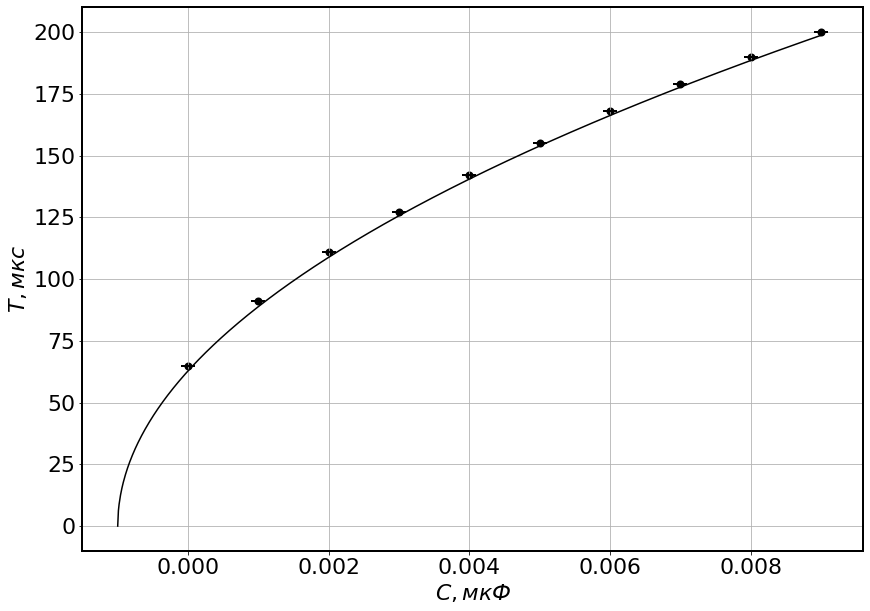

In [59]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(df1.C, df1.TT, linewidth=2, c='black', marker='o', label='1')
ax.plot(np.linspace(0, max(df1.C + 0.001), num=1000) - 0.001, 2 * np.pi * np.sqrt(0.1 * np.linspace(0, max(df1.C + 0.001), num=1000)) * 1000, label='2',c='black')
# ax.plot(df2.C, df2.TT, linewidth=2, c='black', marker='v', label='2')

ax.errorbar(df1.C, df1.TT, xerr = df1.eC, yerr = df1.eT, fmt='none', linewidth=2, c='black')
# ax.errorbar(df2.C, df2.T, xerr = df2.eC, yerr = df2.eT, fmt='none', linewidth=2, c='black')/
# ax.legend()

ax.set_ylabel(r"$T, мкс$")
ax.set_xlabel(r"$С, мкФ$")
fig.savefig(r'images/CT.eps', format='eps')

In [42]:
df2 = pd.read_excel('data2.xlsx')
df2.head()

,"R, Ом",U1,U2,theta,Q,Q2,1R2,eQ2,e1R2
0,410,2.22,0.54,0.353423,8.888774,79.010296,5.948840e-06,2.130331,2.901874e-10
1,810,2.59,0.17,0.680904,4.613722,21.286427,1.524158e-06,0.921450,3.763356e-11
2,1215,2.09,0.09,1.047322,2.999556,8.997339,6.774035e-07,0.636308,1.115068e-11
3,1620,1.70,0.11,1.368952,2.294822,5.266207,3.810395e-07,0.350450,4.704195e-12
4,2025,1.38,0.06,1.567747,2.003831,4.015338,2.438653e-07,0.427273,2.408545e-12


In [50]:
from scipy.optimize import curve_fit
def func(x, R):
    return 1 / 4 * (R**2 * x - 1)
popt, pcov = curve_fit(func, df2['1R2'], df2.Q2)

In [60]:
popt, pcov

(array([7318.41658552]), array([[1158.00536556]]))

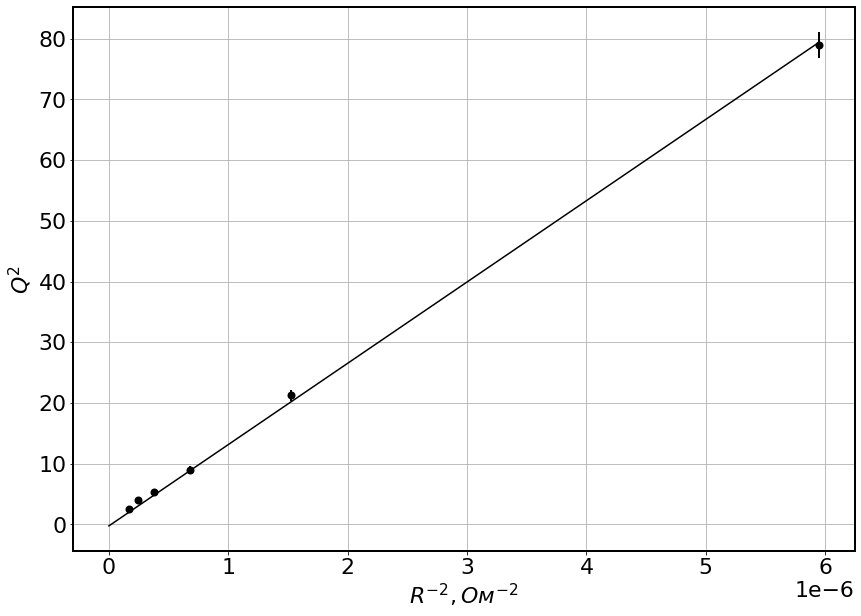

In [57]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(df2['1R2'], df2.Q2, linewidth=2, c='black', marker='o')
plt.plot(np.linspace(0, max(df2['1R2']), num=1000), func(np.linspace(0, max(df2['1R2']), num=1000), popt[0]), label='2',c='black')
ax.errorbar(df2['1R2'], df2.Q2, xerr = df2.e1R2, yerr = df2.eQ2, fmt='none', linewidth=2, c='black')
# ax.legend()

ax.set_ylabel(r"$Q^2$")
ax.set_xlabel(r"$R^{-2}, Ом^{-2}$")
fig.savefig(r'images/RQ.eps', format='eps')